In [1]:
import pandas as pd
print("Pandas version:", pd.__version__)

import sklearn
print("sklearn version:", sklearn.__version__)


# Load the pickle file
data = pd.read_pickle('data.pkl')

# Display the first 5 rows
data.head()


Pandas version: 2.2.3
sklearn version: 1.6.1


garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2021-10-31 AAPL            0.000167  55.907734  4.916514  4.968144  5.019774   
           ABBV            0.000278  62.750394  4.539694  4.567856  4.596018   
           ABT             0.000083  65.824359  4.654933  4.736501  4.818069   
           ACN             0.000066  67.655688  5.697618  5.777004  5.856389   
           ADBE            0.000099  61.108405  6.310407  6.414287  6.518166   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2021-10-31 AAPL    0.477286  0.401625   0.058657  -0.006708   0.009428   
           ABBV   -0.089943  0.079691   0.075927  -0.019734  -0.000688   
           ABT     0.580532  1.377110   0.095299   0.011869   0.022649   
           ACN     0.384491  1.724869   0.124828   0.034029   0.042428   
           ADBE    0.723503  0.907777   0.129646  -0.010101   0.015174   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2021-10-31 AAPL     0.022549   0.014717    0.027509  1.249039 -0.591227   
           ABBV     0.008565   0.016537    0.029174  0.316802  0.178695   
           ABT      0.013162   0.005941    0.018442  0.611880  0.379737   
           ACN      0.037130   0.045796    0.043491  1.215806 -0.287148   
           ADBE     0.041917   0.039537    0.031721  1.645875 -1.149271   

                        HML       RMW       CMA  
date       ticker                                
2021-10-31 AAPL    0.073536 -0.111358 -0.480556  
           ABBV   -0.443544  0.517066  1.161715  
           ABT    -0.455008  0.844288  0.885047  
           ACN    -0.369698  0.414183 -0.001315  
           ADBE    0.334687  0.122523 -0.741955

In [14]:
from sklearn.cluster import KMeans

data = data.drop('cluster', axis=1)

def get_clusters(df):
    df['cluster'] = KMeans(n_clusters=4,random_state=0,init= initial_centroids).fit(df).labels_
    return df

data = data.dropna().groupby('date').apply(get_clusters)
data

garman_klass_vol        rsi    bb_low    bb_mid  \
date       date       ticker                                                    
2021-10-31 2021-10-31 AAPL            0.000167  55.907734  4.916514  4.968144   
                      ABBV            0.000278  62.750394  4.539694  4.567856   
                      ABT             0.000083  65.824359  4.654933  4.736501   
                      ACN             0.000066  67.655688  5.697618  5.777004   
                      ADBE            0.000099  61.108405  6.310407  6.414287   
...                                        ...        ...       ...       ...   
2023-09-30 2023-09-30 VZ              0.000056  42.222499  3.388960  3.421085   
                      WDAY            0.000141  43.976804  5.437299  5.495242   
                      WFC             0.000234  40.920273  3.673898  3.714239   
                      WMT             0.000024  54.722557  3.974950  3.992416   
                      XOM             0.000045  59.440196  4.653137  4.693220   

                               bb_high       atr      macd  return_1m  \
date       date       ticker                                            
2021-10-31 2021-10-31 AAPL    5.019774  0.477286  0.401625   0.058657   
                      ABBV    4.596018 -0.089943  0.079691   0.075927   
                      ABT     4.818069  0.580532  1.377110   0.095299   
                      ACN     5.856389  0.384491  1.724869   0.124828   
                      ADBE    6.518166  0.723503  0.907777   0.129646   
...                                ...       ...       ...        ...   
2023-09-30 2023-09-30 VZ      3.453210 -0.602705 -0.350384  -0.056890   
                      WDAY    5.553185 -0.127668 -0.306858  -0.062413   
                      WFC     3.754579 -0.226358 -0.282325  -0.015500   
                      WMT     4.009883 -0.075666  0.399459  -0.000676   
                      XOM     4.733304  0.885843  1.400624   0.046947   

                              return_2m  return_3m  return_6m  return_9m  \
date       date       ticker                                               
2021-10-31 2021-10-31 AAPL    -0.006708   0.009428   0.022549   0.014717   
                      ABBV    -0.019734  -0.000688   0.008565   0.016537   
                      ABT      0.011869   0.022649   0.013162   0.005941   
                      ACN      0.034029   0.042428   0.037130   0.045796   
                      ADBE    -0.010101   0.015174   0.041917   0.039537   
...                                 ...        ...        ...        ...   
2023-09-30 2023-09-30 VZ      -0.016122  -0.033458  -0.021495  -0.014100   
                      WDAY    -0.016777   0.004919   0.017531   0.035597   
                      WFC     -0.057917  -0.013554   0.016712   0.000702   
                      WMT      0.010014   0.012354   0.017574   0.016553   
                      XOM      0.046139   0.030496   0.012838   0.008747   

                              return_12m    Mkt-RF       SMB       HML  \
date       date       ticker                                             
2021-10-31 2021-10-31 AAPL      0.027509  1.249039 -0.591227  0.073536   
                      ABBV      0.029174  0.316802  0.178695 -0.443544   
                      ABT       0.018442  0.611880  0.379737 -0.455008   
                      ACN       0.043491  1.215806 -0.287148 -0.369698   
                      ADBE      0.031721  1.645875 -1.149271  0.334687   
...                                  ...       ...       ...       ...   
2023-09-30 2023-09-30 VZ       -0.006158  0.272893 -0.138102  0.267201   
                      WDAY      0.034709  0.988028 -0.785685 -0.584472   
                      WFC       0.003255  1.129859  0.256178  1.997772   
                      WMT       0.020256  0.656314 -0.011636 -0.613880   
                      XOM       0.027037  1.030841 -0.917577  1.533432   

                                   RMW       CMA  cluster  
date       dat

In [3]:
import matplotlib.pyplot as plt
def plot_clusters(data):
    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]

    plt.scatter(cluster_0.iloc[:, 5], cluster_0.iloc[:,1], color = 'red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:, 5], cluster_1.iloc[:,1], color = 'green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:, 5], cluster_2.iloc[:,1], color = 'blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:, 5], cluster_3.iloc[:,1], color = 'black', label='cluster 3')

    plt.legend()
    plt.show()
    return


Matplotlib is building the font cache; this may take a moment.


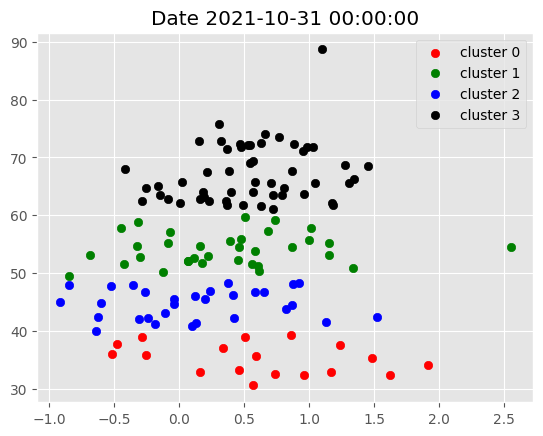

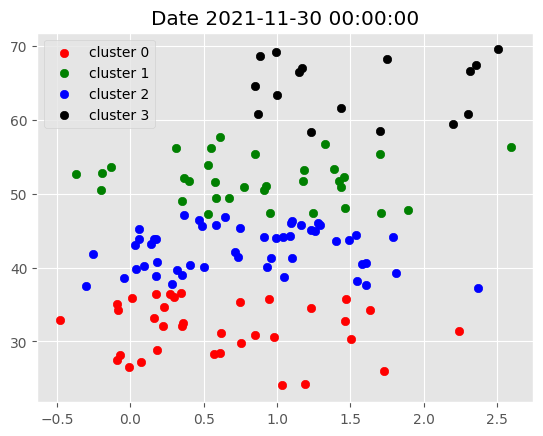

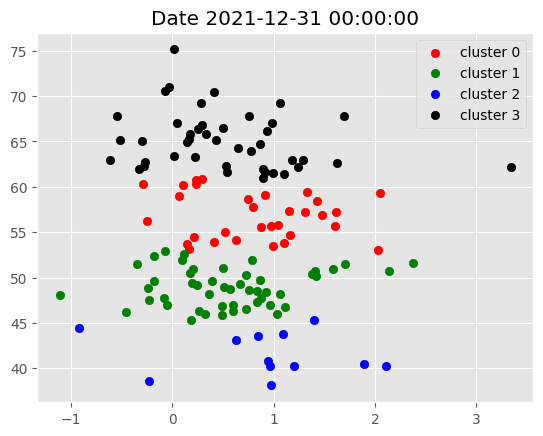

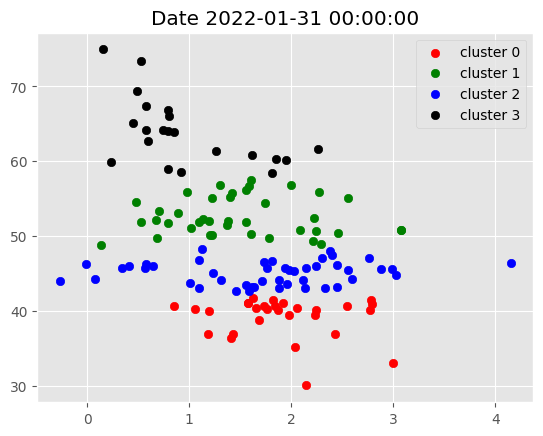

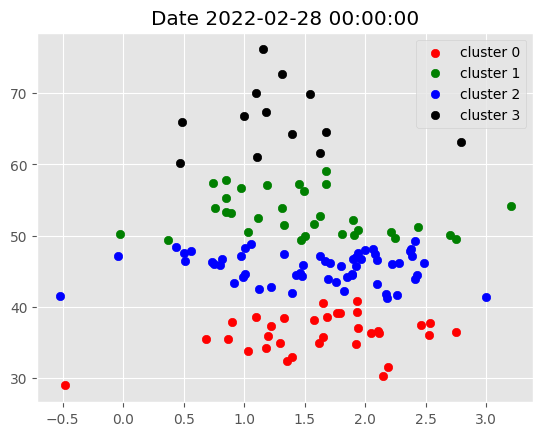

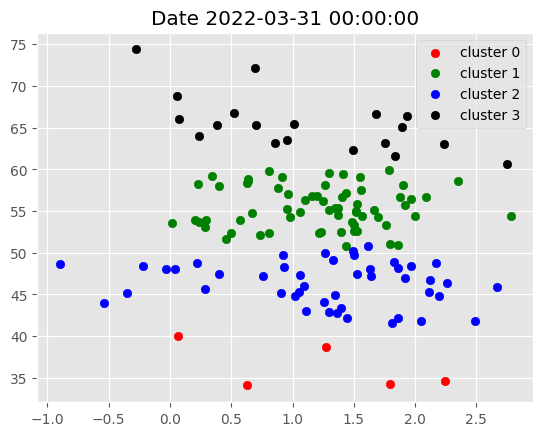

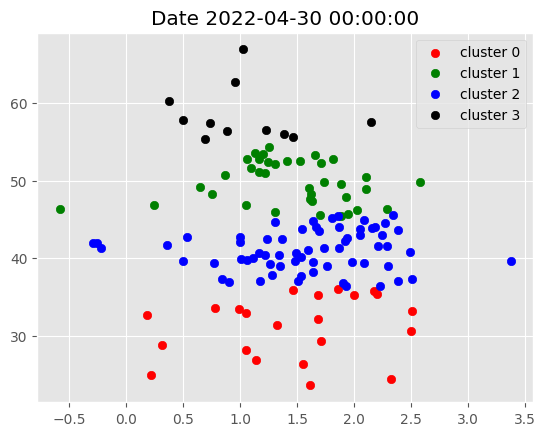

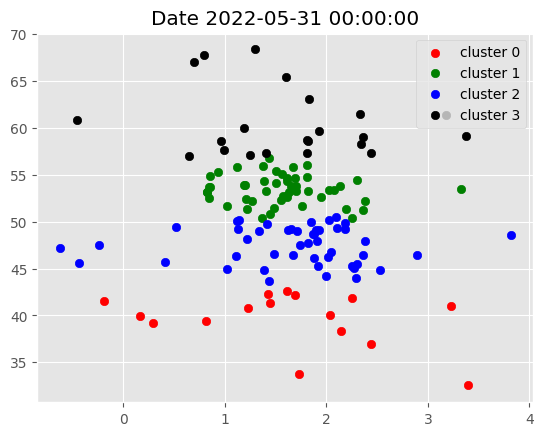

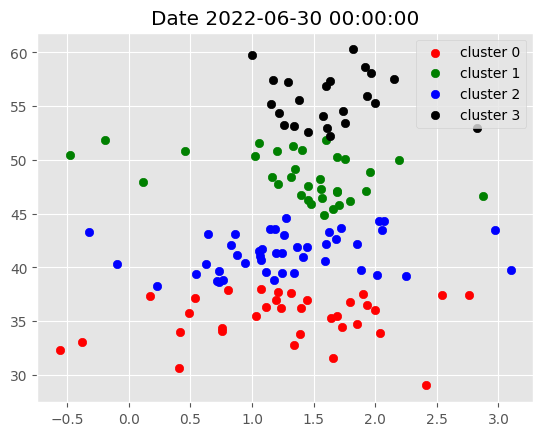

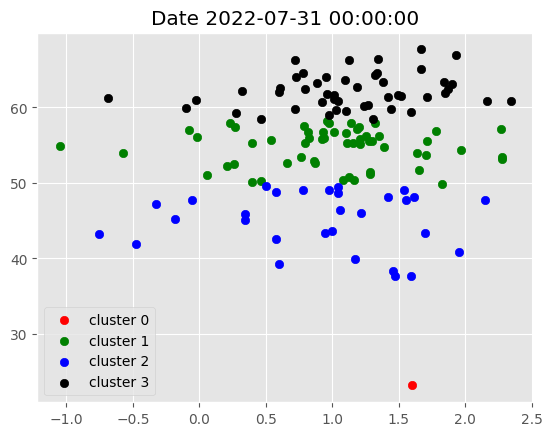

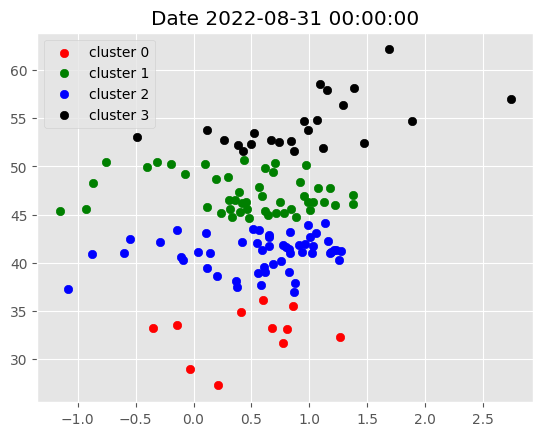

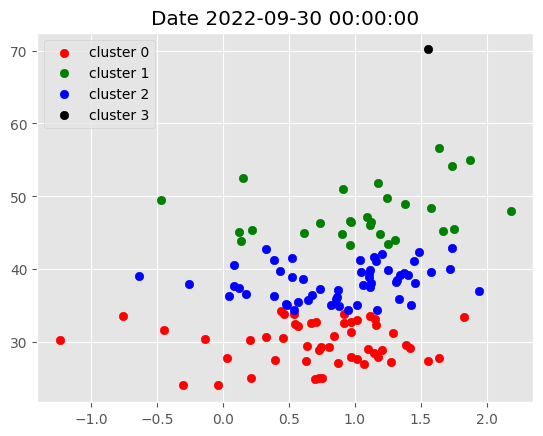

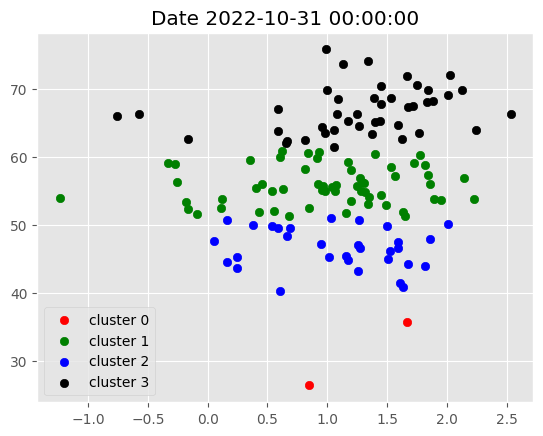

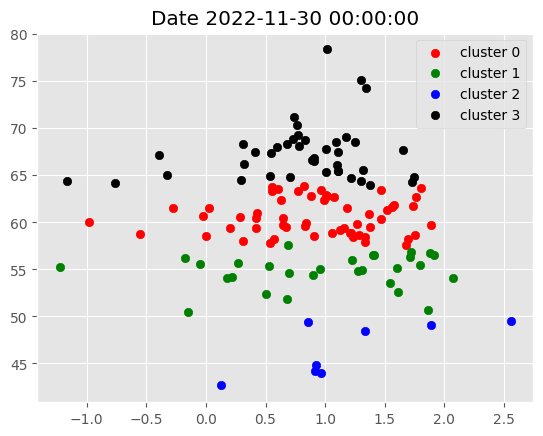

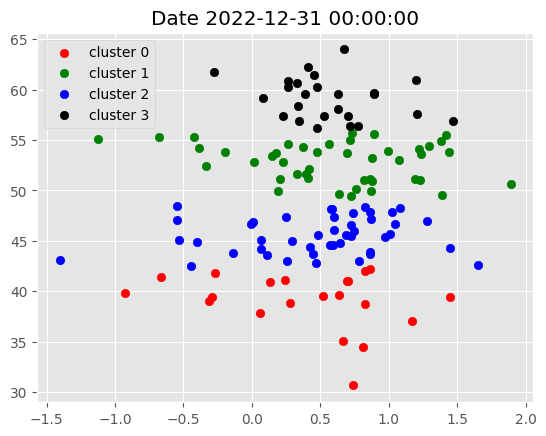

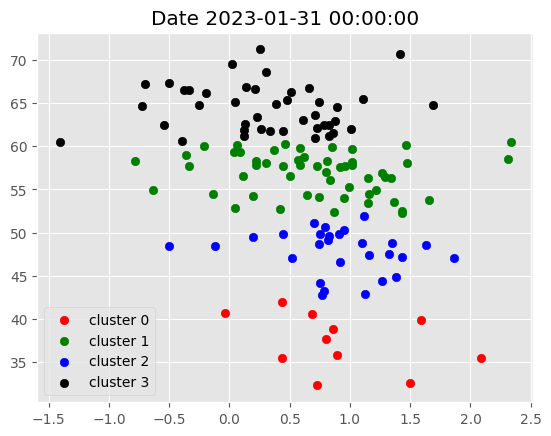

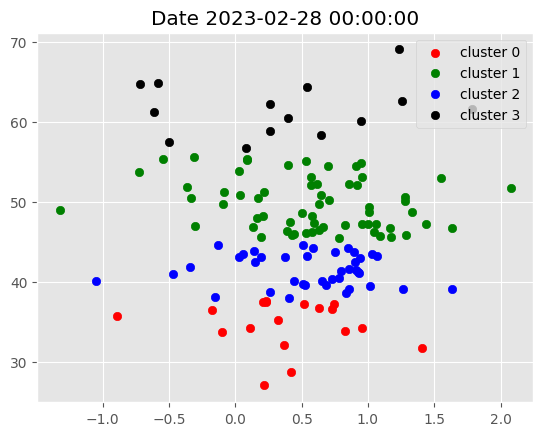

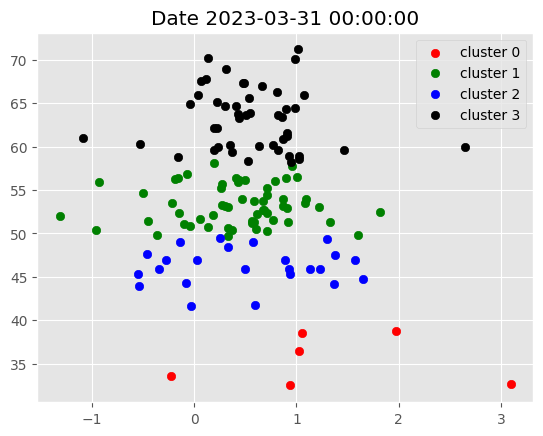

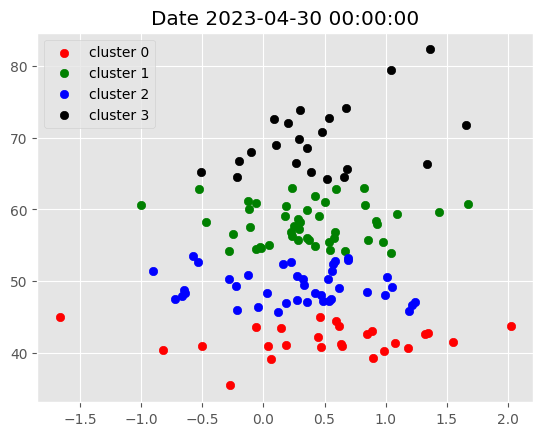

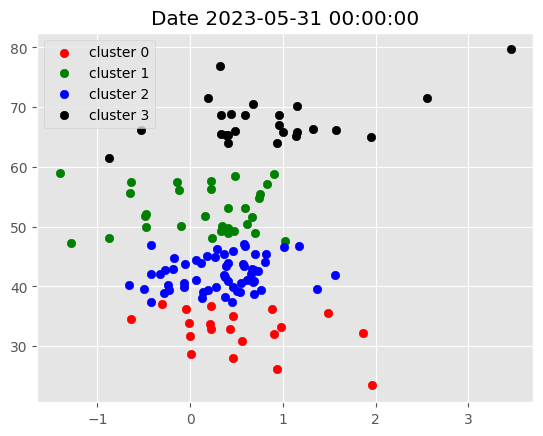

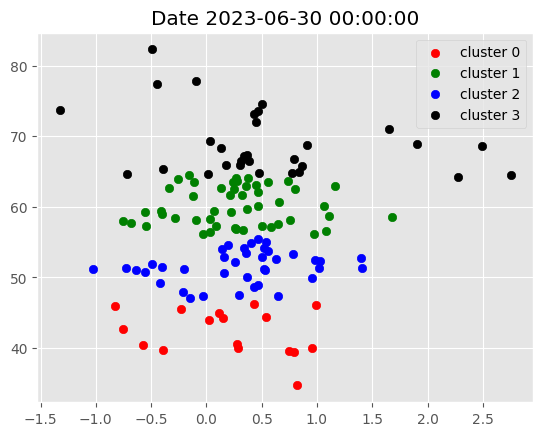

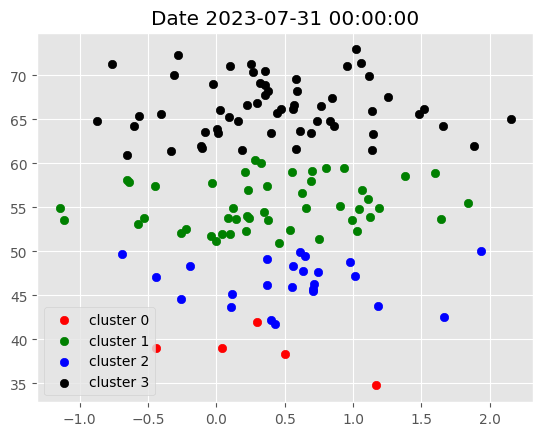

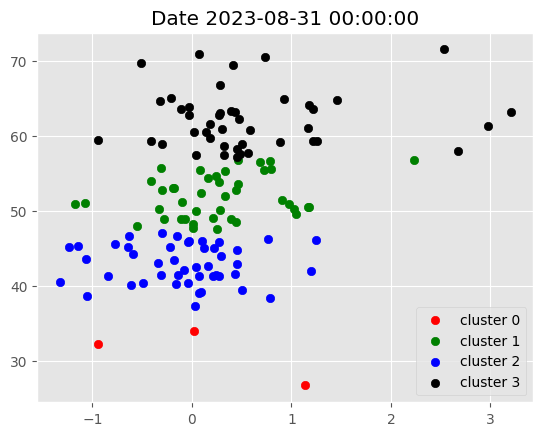

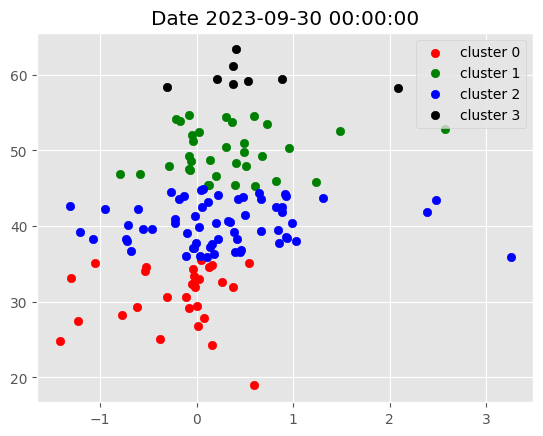

In [15]:
plt.style.use('ggplot')

for i in data.index.get_level_values(0).unique().tolist():
    g = data.xs(i,level=0)
    plt.title(f'Date {i}')
    plot_clusters(g)

In [8]:
# Drop one of the duplicate 'date' levels
data.index = data.index.droplevel(1)

print(data.index.names)



['date', 'ticker']


In [16]:
import numpy as np
target_rsi_values = [30,45,44,70]
initial_centroids = np.zeros((len(target_rsi_values),18))

initial_centroids[:, 1] = target_rsi_values

initial_centroids

array([[ 0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 44.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])